MA4240 - Laptop Specifications Analysis
>Haritha . R -AI20BTECH11010


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import math

Mounted at /content/drive


In [2]:
data = pd.read_csv("/content/drive/MyDrive/MA4240/laptop_responses_final.csv")
data.head(15)

,timestamp,email,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time
0,3/29/2022 17:15:21,ep18btech11011@iith.ac.in,UG,Lenovo,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,None,HDD,500 GB,None,Windows,180
1,3/29/2022 17:15:29,ee21resch01003@iith.ac.in,PhD,HP,"Rs. 50,000 - Rs. 60,000",13 inch - 14 inch,Non-Touch,16 GB,2 GHZ - 3 GHZ,Intel,Intel i5,Intel Graphics,SSD,None,512 GB,Windows,212
2,3/29/2022 17:16:12,ai21mtech13006@iith.ac.in,PG,HP,"Rs. 40,000 - Rs. 50,000",14 inch - 15 inch,Non-Touch,4 GB,2 GHZ - 3 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,164
3,3/29/2022 17:16:50,ai20btech11022@iith.ac.in,UG,Apple,"Rs. 90,000 and above",13 inch - 14 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Apple,M1,None,SSD,None,256 GB,MacOS,469
4,3/29/2022 17:18:23,ns20mtech11004@iith.ac.in,PG,Lenovo,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,AMD,AMD Ryzen 7,Nvidia Graphics,SSD,None,512 GB,Linux,413
5,3/29/2022 17:18:23,ch20btech11040@iith.ac.in,UG,Dell,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,Intel,Intel i5,Nvidia Graphics,SSD,None,512 GB,Windows,324
6,3/29/2022 17:19:02,ch18btech11005@iith.ac.in,UG,HP,"Rs. 50,000 - Rs. 60,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,Intel,Intel i7,Nvidia Graphics,HDD,1 TB,None,"Windows, Linux",841
7,3/29/2022 17:19:12,ch20resch11003@iith.ac.in,PhD,Lenovo,"Rs. 30,000 - Rs. 40,000",14 inch - 15 inch,Non-Touch,4 GB,1 GHZ - 2 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,647
8,3/29/2022 17:24:27,cs20resch11003@iith.ac.in,PhD,Dell,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,AMD Radeon Graphics,HDD,1 TB,None,"Windows, Linux",626
9,3/29/2022 17:24:53,me19btech11008@iith.ac.in,UG,HP,"Rs. 90,000 and above",15 inch - 16 inch,Touch,16 GB,3 GHZ and above,Intel,Intel i7,Intel Graphics,HDD,500 GB,None,Windows,683


In [3]:
data.columns

Index(['timestamp', 'email', 'stream', 'brand', 'price_range', 'display',
       'display_type', 'ram_size', 'cpu_clock_speed', 'cpu', 'cpu_model',
       'graphic_card', 'storage_type', 'hdd_size', 'ssd_size', 'operating_sys',
       'avg_watch_time'],
      dtype='object')

In [4]:
data[0:10]

,timestamp,email,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time
0,3/29/2022 17:15:21,ep18btech11011@iith.ac.in,UG,Lenovo,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,None,HDD,500 GB,None,Windows,180
1,3/29/2022 17:15:29,ee21resch01003@iith.ac.in,PhD,HP,"Rs. 50,000 - Rs. 60,000",13 inch - 14 inch,Non-Touch,16 GB,2 GHZ - 3 GHZ,Intel,Intel i5,Intel Graphics,SSD,None,512 GB,Windows,212
2,3/29/2022 17:16:12,ai21mtech13006@iith.ac.in,PG,HP,"Rs. 40,000 - Rs. 50,000",14 inch - 15 inch,Non-Touch,4 GB,2 GHZ - 3 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,164
3,3/29/2022 17:16:50,ai20btech11022@iith.ac.in,UG,Apple,"Rs. 90,000 and above",13 inch - 14 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Apple,M1,None,SSD,None,256 GB,MacOS,469
4,3/29/2022 17:18:23,ns20mtech11004@iith.ac.in,PG,Lenovo,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,AMD,AMD Ryzen 7,Nvidia Graphics,SSD,None,512 GB,Linux,413
5,3/29/2022 17:18:23,ch20btech11040@iith.ac.in,UG,Dell,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,Intel,Intel i5,Nvidia Graphics,SSD,None,512 GB,Windows,324
6,3/29/2022 17:19:02,ch18btech11005@iith.ac.in,UG,HP,"Rs. 50,000 - Rs. 60,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,Intel,Intel i7,Nvidia Graphics,HDD,1 TB,None,"Windows, Linux",841
7,3/29/2022 17:19:12,ch20resch11003@iith.ac.in,PhD,Lenovo,"Rs. 30,000 - Rs. 40,000",14 inch - 15 inch,Non-Touch,4 GB,1 GHZ - 2 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,647
8,3/29/2022 17:24:27,cs20resch11003@iith.ac.in,PhD,Dell,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,AMD Radeon Graphics,HDD,1 TB,None,"Windows, Linux",626
9,3/29/2022 17:24:53,me19btech11008@iith.ac.in,UG,HP,"Rs. 90,000 and above",15 inch - 16 inch,Touch,16 GB,3 GHZ and above,Intel,Intel i7,Intel Graphics,HDD,500 GB,None,Windows,683


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        239 non-null    object
 1   email            239 non-null    object
 2   stream           239 non-null    object
 3   brand            239 non-null    object
 4   price_range      239 non-null    object
 5   display          239 non-null    object
 6   display_type     239 non-null    object
 7   ram_size         239 non-null    object
 8   cpu_clock_speed  239 non-null    object
 9   cpu              239 non-null    object
 10  cpu_model        239 non-null    object
 11  graphic_card     239 non-null    object
 12  storage_type     239 non-null    object
 13  hdd_size         239 non-null    object
 14  ssd_size         239 non-null    object
 15  operating_sys    239 non-null    object
 16  avg_watch_time   239 non-null    int64 
dtypes: int64(1), object(16)
memory usag


for each column,
analysing the type of data-numerical/categorical\
for categorical - calculate proportion/count and get mode\
for numerical - measures of central tendency,
                shape of the distribution,skewness , dispersion\
Visualise the data                




In [6]:
data['department']=data['email'].str[:2]
data['year_join']=data['email'].str[2:4]


In [7]:
data=data.drop(['email', 'timestamp'], axis=1)

In [8]:
final_df = data.copy(deep=True)

In [9]:
final_df = final_df.replace(to_replace="4 GB",value = 4)
final_df = final_df.replace(to_replace="8 GB",value = 8)
final_df = final_df.replace(to_replace="12 GB",value = 12)
final_df = final_df.replace(to_replace="16 GB",value = 16)
final_df = final_df.replace(to_replace="24 GB",value = 24)
final_df = final_df.replace(to_replace="32 GB",value = 32)
final_df = final_df.replace(to_replace="48 GB",value = 48)

In [10]:
print(final_df['ram_size'].dtype)

int64


In [11]:
final_df['year_join'] = final_df['year_join'].astype(int)

In [12]:
print(final_df['year_join'].dtype)

int64


In [13]:
final_df.head(10)

,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time,department,year_join
0,UG,Lenovo,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Touch,8,2 GHZ - 3 GHZ,Intel,Intel i7,None,HDD,500 GB,None,Windows,180,ep,18
1,PhD,HP,"Rs. 50,000 - Rs. 60,000",13 inch - 14 inch,Non-Touch,16,2 GHZ - 3 GHZ,Intel,Intel i5,Intel Graphics,SSD,None,512 GB,Windows,212,ee,21
2,PG,HP,"Rs. 40,000 - Rs. 50,000",14 inch - 15 inch,Non-Touch,4,2 GHZ - 3 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,164,ai,21
3,UG,Apple,"Rs. 90,000 and above",13 inch - 14 inch,Non-Touch,8,2 GHZ - 3 GHZ,Apple,M1,None,SSD,None,256 GB,MacOS,469,ai,20
4,PG,Lenovo,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8,3 GHZ and above,AMD,AMD Ryzen 7,Nvidia Graphics,SSD,None,512 GB,Linux,413,ns,20
5,UG,Dell,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Non-Touch,8,3 GHZ and above,Intel,Intel i5,Nvidia Graphics,SSD,None,512 GB,Windows,324,ch,20
6,UG,HP,"Rs. 50,000 - Rs. 60,000",14 inch - 15 inch,Non-Touch,8,3 GHZ and above,Intel,Intel i7,Nvidia Graphics,HDD,1 TB,None,"Windows, Linux",841,ch,18
7,PhD,Lenovo,"Rs. 30,000 - Rs. 40,000",14 inch - 15 inch,Non-Touch,4,1 GHZ - 2 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,647,ch,20
8,PhD,Dell,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8,2 GHZ - 3 GHZ,Intel,Intel i7,AMD Radeon Graphics,HDD,1 TB,None,"Windows, Linux",626,cs,20
9,UG,HP,"Rs. 90,000 and above",15 inch - 16 inch,Touch,16,3 GHZ and above,Intel,Intel i7,Intel Graphics,HDD,500 GB,None,Windows,683,me,19


In [14]:
data.head(5)

,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time,department,year_join
0,UG,Lenovo,"Rs. 70,000 - Rs. 80,000",14 inch - 15 inch,Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i7,None,HDD,500 GB,None,Windows,180,ep,18
1,PhD,HP,"Rs. 50,000 - Rs. 60,000",13 inch - 14 inch,Non-Touch,16 GB,2 GHZ - 3 GHZ,Intel,Intel i5,Intel Graphics,SSD,None,512 GB,Windows,212,ee,21
2,PG,HP,"Rs. 40,000 - Rs. 50,000",14 inch - 15 inch,Non-Touch,4 GB,2 GHZ - 3 GHZ,Intel,Intel i3,None,HDD,500 GB,None,Windows,164,ai,21
3,UG,Apple,"Rs. 90,000 and above",13 inch - 14 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Apple,M1,None,SSD,None,256 GB,MacOS,469,ai,20
4,PG,Lenovo,"Rs. 60,000 - Rs. 70,000",14 inch - 15 inch,Non-Touch,8 GB,3 GHZ and above,AMD,AMD Ryzen 7,Nvidia Graphics,SSD,None,512 GB,Linux,413,ns,20


In [15]:
Value_counts_of_columns = []
for column in data.columns:
    tmp_series = data[column].value_counts()
    tmp_series.name = column
    Value_counts_of_columns.append(tmp_series)

for i in Value_counts_of_columns :
  print(i,"\n")

UG     155
PG      56
PhD     28
Name: stream, dtype: int64 

HP        67
Dell      54
Lenovo    46
Asus      31
Acer      20
Apple     19
MSI        1
Xiaomi     1
Name: brand, dtype: int64 

Rs. 90,000 and above       53
Rs. 60,000 - Rs. 70,000    52
Rs. 50,000 - Rs. 60,000    40
Rs. 40,000 - Rs. 50,000    34
Rs. 70,000 - Rs. 80,000    28
Rs. 80,000 - Rs. 90,000    19
Rs. 30,000 - Rs. 40,000    13
Name: price_range, dtype: int64 

14 inch - 15 inch    100
15 inch - 16 inch     74
13 inch - 14 inch     45
12 inch - 13 inch     15
16 inch - 17 inch      5
Name: display, dtype: int64 

Non-Touch    213
Touch         26
Name: display_type, dtype: int64 

8 GB     135
16 GB     71
4 GB      15
32 GB     12
12 GB      3
24 GB      2
48 GB      1
Name: ram_size, dtype: int64 

2 GHZ - 3 GHZ      93
3 GHZ and above    68
Not sure           49
1 GHZ - 2 GHZ      29
Name: cpu_clock_speed, dtype: int64 

Intel    184
AMD       39
Apple     16
Name: cpu, dtype: int64 

Intel i5               10

In [16]:
directory_type_of_data ={col_type :[] for col_type in ["regular categorigal","ordinal categorical","discrete numerical","continous numerical"]}
directory_type_of_data["regular categorigal"]=['stream','brand','display_type','cpu','cpu_model','graphic_card','storage_type','operating_sys','department'
                                                      ,'cpu_clock_speed','hdd_size','ssd_size']
directory_type_of_data["ordinal categorical"]=['price_range','display']
directory_type_of_data["discrete numerical"]=['ram_size','year_join']
directory_type_of_data["continous numerical"]=['avg_watch_time']

In [17]:
for col_type in directory_type_of_data:
  print(col_type ,'-',directory_type_of_data[col_type])

regular categorigal - ['stream', 'brand', 'display_type', 'cpu', 'cpu_model', 'graphic_card', 'storage_type', 'operating_sys', 'department', 'cpu_clock_speed', 'hdd_size', 'ssd_size']
ordinal categorical - ['price_range', 'display']
discrete numerical - ['ram_size', 'year_join']
continous numerical - ['avg_watch_time']


In [18]:
data.mode()

,stream,brand,price_range,display,display_type,ram_size,cpu_clock_speed,cpu,cpu_model,graphic_card,storage_type,hdd_size,ssd_size,operating_sys,avg_watch_time,department,year_join
0,UG,HP,"Rs. 90,000 and above",14 inch - 15 inch,Non-Touch,8 GB,2 GHZ - 3 GHZ,Intel,Intel i5,Nvidia Graphics,SSD,None,512 GB,Windows,451,cs,20
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,883,NaN,NaN


**Categorical**

Windows - 215
Linux - 72
MacOS - 22


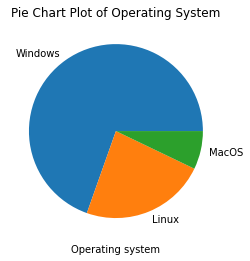

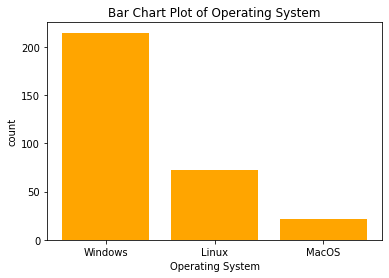

In [19]:

y = pd.get_dummies(data.operating_sys)
y.Linux += y["Windows, Linux, MacOS"]
y.Windows += y["Windows, Linux, MacOS"]
y.MacOS += y["Windows, Linux, MacOS"]
y.Windows += y["Windows, Linux"]
y.Linux += y["Windows, Linux"]

y.drop(['Windows, Linux', 'Windows, Linux, MacOS'], axis = 1 ,inplace = True)


categors=['Windows','Linux','MacOS'] 
category_count = []
for i in categors:
        category_count.append(y[i].value_counts()[1])
        print(i,"-",y[i].value_counts()[1]) 
plt.figure()
plt.pie(list(category_count),labels=list(categors))
plt.xlabel('Operating system')
plt.title('Pie Chart Plot of Operating System')
plt.show() 
plt.figure()
plt.bar(list(categors) , list(category_count),color='orange')
plt.ylabel("count")
plt.xlabel('Operating System')
plt.title('Bar Chart Plot of Operating System')
plt.show()
                        

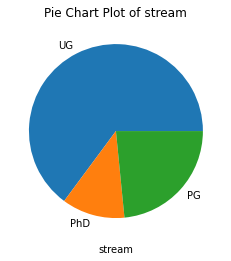

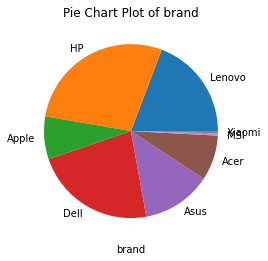

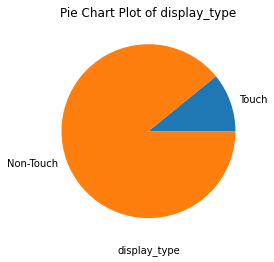

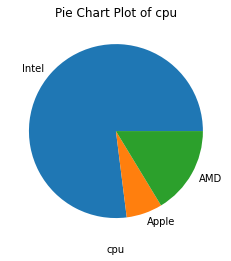

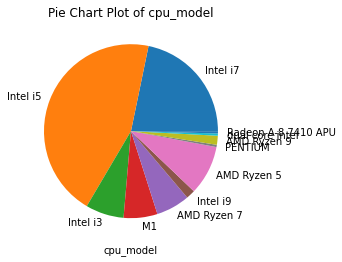

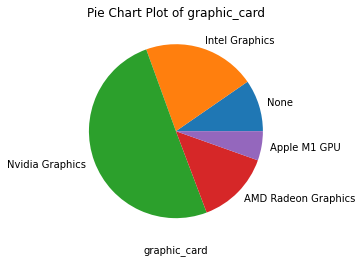

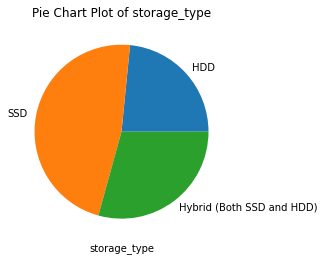

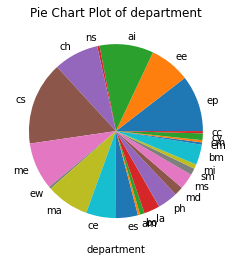

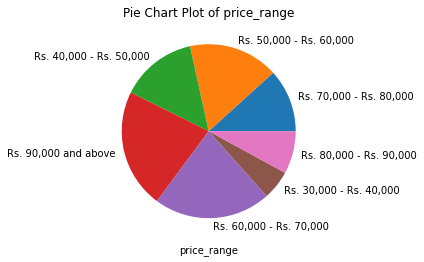

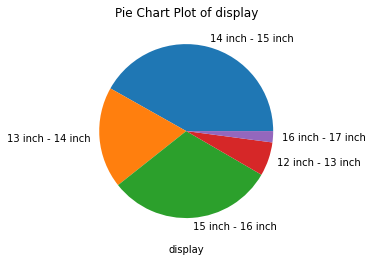

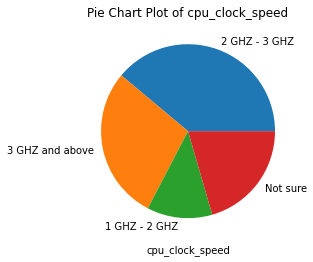

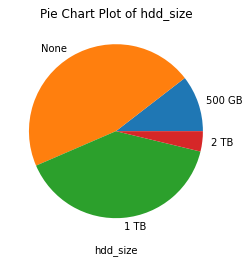

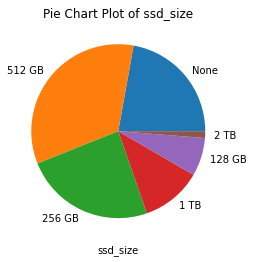

In [20]:
columns1=['stream', 'brand', 'display_type', 'cpu', 'cpu_model', 'graphic_card', 'storage_type', 'department','price_range', 'display',
                     'cpu_clock_speed', 'hdd_size', 'ssd_size']

categors=[] 

for col in columns1:
    categors = data[col].unique()
    category_count = []
    for i in categors:
        category_count.append(data[col].value_counts()[i])
    plt.figure()
    plt.pie(list(category_count),labels=list(categors))
    plt.xlabel(col)
    plt.title('Pie Chart Plot of '+col)
    plt.show()                     


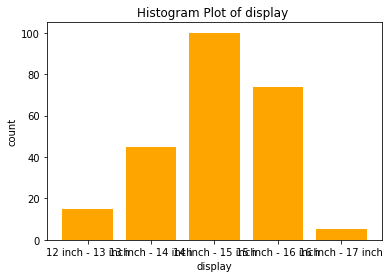

14 inch - 15 inch    100
15 inch - 16 inch     74
13 inch - 14 inch     45
12 inch - 13 inch     15
16 inch - 17 inch      5
Name: display, dtype: int64


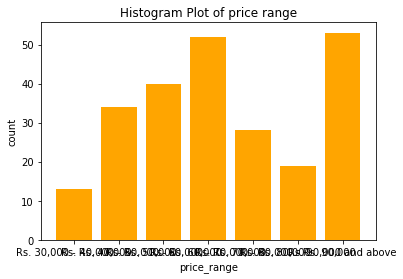

Rs. 90,000 and above       53
Rs. 60,000 - Rs. 70,000    52
Rs. 50,000 - Rs. 60,000    40
Rs. 40,000 - Rs. 50,000    34
Rs. 70,000 - Rs. 80,000    28
Rs. 80,000 - Rs. 90,000    19
Rs. 30,000 - Rs. 40,000    13
Name: price_range, dtype: int64


In [21]:
column3=['price_range', 'display']

categors_collect_price_range=np.array([ 'Rs. 30,000 - Rs. 40,000','Rs. 40,000 - Rs. 50,000', 'Rs. 50,000 - Rs. 60,000','Rs. 60,000 - Rs. 70,000', 
                                                              'Rs. 70,000 - Rs. 80,000','Rs. 80,000 - Rs. 90,000', 'Rs. 90,000 and above'])
categors_collect_display = np.array(['12 inch - 13 inch', '13 inch - 14 inch', '14 inch - 15 inch', '15 inch - 16 inch', '16 inch - 17 inch'])

category_count = []
for i in categors_collect_display:
        category_count.append(data['display'].value_counts()[i])
plt.figure()
plt.bar(list(categors_collect_display) , list(category_count),color='orange')
plt.ylabel("count")
plt.xlabel("display")
plt.title('Histogram Plot of display ')
plt.show()
print(data['display'].value_counts())           

category_count = []
for i in categors_collect_price_range:
        category_count.append(data['price_range'].value_counts()[i])
plt.figure()
plt.bar(list(categors_collect_price_range) , list(category_count),color='orange')
plt.ylabel("count")
plt.xlabel("price_range")
plt.title('Histogram Plot of price range')
plt.show()
print(data['price_range'].value_counts())           


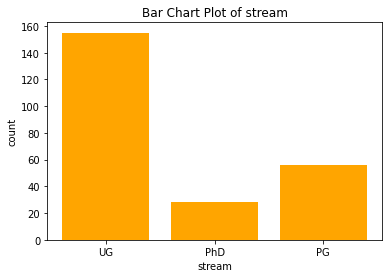

UG     155
PG      56
PhD     28
Name: stream, dtype: int64


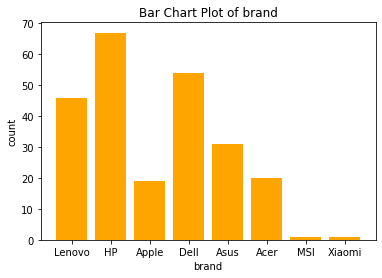

HP        67
Dell      54
Lenovo    46
Asus      31
Acer      20
Apple     19
MSI        1
Xiaomi     1
Name: brand, dtype: int64


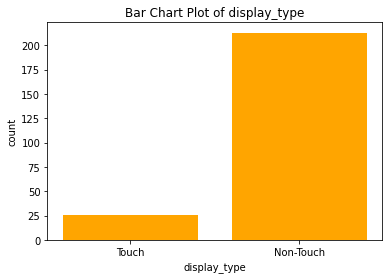

Non-Touch    213
Touch         26
Name: display_type, dtype: int64


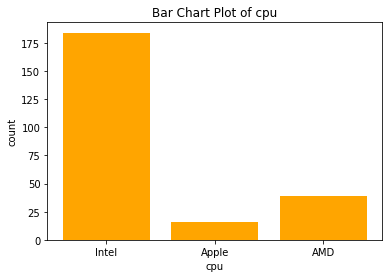

Intel    184
AMD       39
Apple     16
Name: cpu, dtype: int64


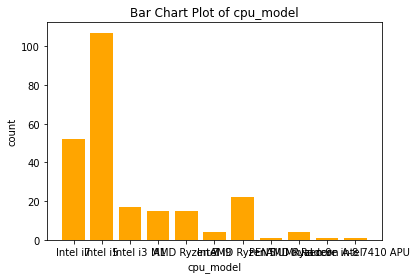

Intel i5               107
Intel i7                52
AMD Ryzen 5             22
Intel i3                17
M1                      15
AMD Ryzen 7             15
Intel i9                 4
AMD Ryzen 9              4
PENTIUM                  1
dual core intel          1
Radeon A-8 7410 APU      1
Name: cpu_model, dtype: int64


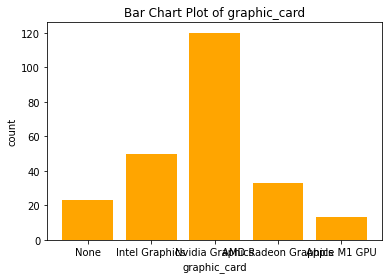

Nvidia Graphics        120
Intel Graphics          50
AMD Radeon Graphics     33
None                    23
Apple M1 GPU            13
Name: graphic_card, dtype: int64


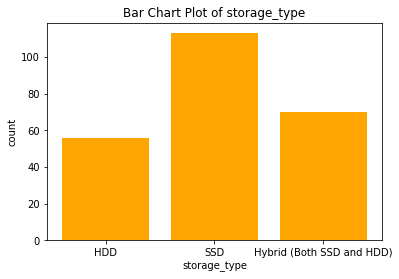

SSD                          113
Hybrid (Both SSD and HDD)     70
HDD                           56
Name: storage_type, dtype: int64


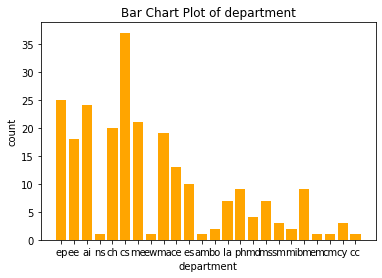

cs    37
ep    25
ai    24
me    21
ch    20
ma    19
ee    18
ce    13
es    10
bm     9
ph     9
la     7
ms     7
md     4
cy     3
sm     3
mi     2
bo     2
am     1
ew     1
em     1
cm     1
ns     1
cc     1
Name: department, dtype: int64


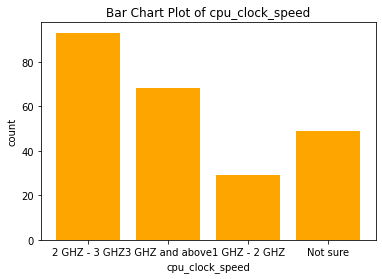

2 GHZ - 3 GHZ      93
3 GHZ and above    68
Not sure           49
1 GHZ - 2 GHZ      29
Name: cpu_clock_speed, dtype: int64


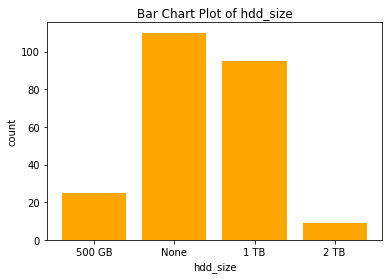

None      110
1 TB       95
500 GB     25
2 TB        9
Name: hdd_size, dtype: int64


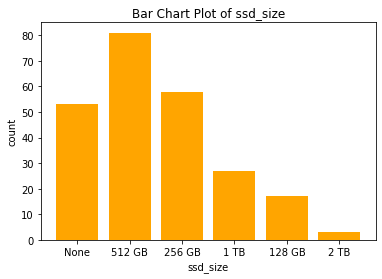

512 GB    81
256 GB    58
None      53
1 TB      27
128 GB    17
2 TB       3
Name: ssd_size, dtype: int64


In [22]:
column2= ['stream','brand','display_type','cpu','cpu_model','graphic_card','storage_type','department','cpu_clock_speed','hdd_size','ssd_size']
categors=[] 

for col in column2:
    categors = data[col].unique()
    category_count = []
    for i in categors:
        category_count.append(data[col].value_counts()[i])
    plt.figure()
    plt.bar(list(categors) , list(category_count),color='orange')
    plt.ylabel("count")
    plt.xlabel(col)
    plt.title('Bar Chart Plot of '+col)
    plt.show()
    print(data[col].value_counts())                     


In [23]:
#data.stream.value_counts()
data['stream'].unique()
#data['stream'].value_counts()['UG']


array(['UG', 'PhD', 'PG'], dtype=object)

In [24]:
from scipy.stats import iqr

In [25]:
final_df.avg_watch_time.mode()

0    451
1    844
2    883
dtype: int64


Modes of  avg_watch_time are [451, 844, 883]
mean of  avg_watch_time is 474.092050209205
median of  avg_watch_time is 467.0
Range of avg_watch_time = 867
0 th of  avg_watch_time quartile= 33.0
1 th of  avg_watch_time quartile= 251.5
2 th of  avg_watch_time quartile= 467.0
3 th of  avg_watch_time quartile= 679.0
4 th of  avg_watch_time quartile= 900.0
IQR of avg_watch_time = 427.5
Variance of avg_watch_time = 64306.15052257488
Standard deviation of avg_watch_time = 253.5865740187656


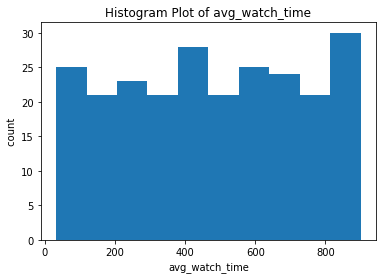

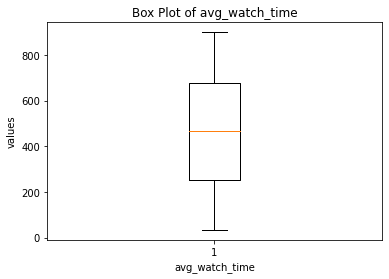


Modes of  ram_size are [8]
mean of  ram_size is 11.682008368200837
median of  ram_size is 8.0
Range of ram_size = 44
0 th of  ram_size quartile= 4.0
1 th of  ram_size quartile= 8.0
2 th of  ram_size quartile= 8.0
3 th of  ram_size quartile= 16.0
4 th of  ram_size quartile= 48.0
IQR of ram_size = 8.0
Variance of ram_size = 44.417709773988555
Standard deviation of ram_size = 6.664661264759714


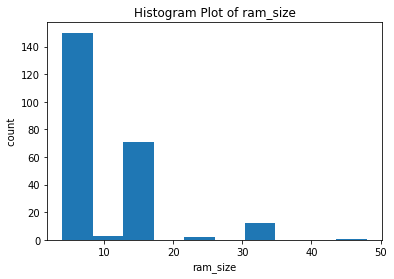

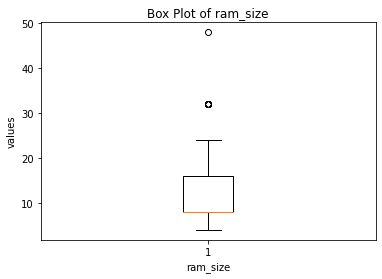


Modes of  year_join are [20]
mean of  year_join is 19.740585774058577
median of  year_join is 20.0
Range of year_join = 6
0 th of  year_join quartile= 16.0
1 th of  year_join quartile= 19.0
2 th of  year_join quartile= 20.0
3 th of  year_join quartile= 21.0
4 th of  year_join quartile= 22.0
IQR of year_join = 2.0
Variance of year_join = 1.5477670208854886
Standard deviation of year_join = 1.2440928505885276


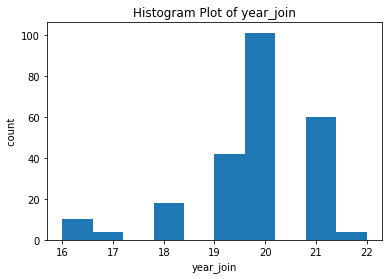

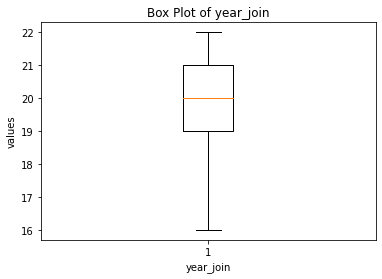

In [26]:
columns5=['avg_watch_time','ram_size','year_join']
for col in columns5: 
    print("\nModes of ",col,"are",list(final_df[col].mode().values))
    y=np.array(final_df[col])
    print("mean of ",col ,"is", y.mean())
    print("median of ",col ,"is",np.median(y))
    Range =(max(y)-min(y))
    print("Range of",col,"=",Range)
    print("0 th of ",col,"quartile=",np.percentile(y,0))
    print("1 th of ",col,"quartile=",np.percentile(y,25))
    print("2 th of ",col,"quartile=",np.percentile(y,50))
    print("3 th of ",col,"quartile=",np.percentile(y,75))
    print("4 th of ",col,"quartile=",np.percentile(y,100))
    print("IQR of",col,"=",iqr(y) )
    print("Variance of",col,"=",np.var(y) )
    print("Standard deviation of",col,"=",np.std(y) )
    plt.figure()
    plt.ylabel(" count ")
    plt.xlabel(col)
    plt.title('Histogram Plot of '+col)
    plt.hist(y)
    plt.show()

    plt.figure()
    plt.ylabel("values")
    plt.xlabel(col)
    plt.title('Box Plot of '+col)
    plt.boxplot(y)
    plt.show()



# **Sampling Distribution**



# **Final Function for Sampling Distribution Analysis of both Numerical Data and Categorical Data**

# **The Function takes arguments a (Dataframe, Sample Size, Number of Samples)**

# **It returns all the Sampling Distribution Plots with parameters like Mean,Variance, Standard Error for Numerical Data and Parameter like Mode for Categorical Data for the given sample size and number of samples**

In [27]:
def func2(df,sample_size,n_samples):
  
  num_col = []
  categ_col = []
  for col in df.columns:
    if(df[col].dtype != 'int64'):
      categ_col.append(col)
    else:
      num_col.append(col)
  
  plt.rcParams.update({'font.size': 8})
  plt.rcParams["figure.figsize"] = (7,5)
  
  print("\n------------------------------------------------------------------------------------------------------------------------------------------")
  print("------------------------------------------------------------------------------------------------------------------------------------------")
  print("\n\nSampling Distributions of Numerical Data in given dataframe\n")
  
  # For Numerical Data
  num_df = df.drop(categ_col,axis=1)

  num_new_df = pd.DataFrame(columns=num_col)

  samp_mean_col_list = []
  samp_variance_col_list = []
  stand_error_col_list = []

  for j in range(n_samples):
    num_new_df = pd.DataFrame(columns=num_col)
    index = np.random.randint(0,len(num_df),sample_size)
    num_new_df = num_new_df.append(num_df.iloc[index],ignore_index=True)
    samp_mean_col = num_new_df.mean()
    samp_variance_col = num_new_df.var()
    stand_error_col = num_new_df.sem()
    samp_mean_col_list.append(samp_mean_col.to_numpy())
    samp_variance_col_list.append(samp_variance_col.to_numpy())
    stand_error_col_list.append(stand_error_col.to_numpy())
  
  samp_mean_col_list = np.array(samp_mean_col_list)
  samp_variance_col_list = np.array(samp_variance_col_list)
  stand_error_col_list = np.array(stand_error_col_list)

  total_sample_mean = np.mean(samp_mean_col_list,axis=0)
  var_of_sample_means = np.var(samp_mean_col_list,ddof=0,axis=0)
  total_sample_variance = np.mean(samp_variance_col_list,axis=0)
  total_sample_stand_error = np.mean(stand_error_col_list,axis=0)

  


  for i in range(len(num_col)):

    num_df[num_col[i]].plot.hist(bins=50)
    plt.title("Population Distribution for column {}".format(num_col[i]))
    plt.xlabel("{}".format(num_col[i]))
    plt.ylabel("Frequency")
    plt.show()

    print("\nExpectation of Sample Mean(Sample Size = {}) of {} for {} random combinations is {}".format(sample_size,num_col[i],n_samples,total_sample_mean[i]))
    print("Variance of Sample Mean(Sample Size = {}) of {} for {} random combinations is {}".format(sample_size,num_col[i],n_samples,var_of_sample_means[i]))
    print("Expectation of Sample Variance(Sample Size = {}) of {} for {} random combinations is {}".format(sample_size,num_col[i],n_samples,total_sample_variance[i]))
    print("Standard Error(Sample Size = {}) of {} for {} random combinations is {}\n".format(sample_size,num_col[i],n_samples,total_sample_stand_error[i]))
    
    x = max(samp_mean_col_list[:,i])-min(samp_mean_col_list[:,i])
    if(x < 100):
      x = 100
    plt.hist(samp_mean_col_list[:,i],bins=int(x/10))
    plt.title("Sampling Distribution(Sample Size = {}) of Mean of {} random samples for column {}".format(sample_size,n_samples,num_col[i]))
    plt.xlabel("{}".format(num_col[i]))
    plt.ylabel("Frequency")
    plt.show()
    
    """z = max(samp_variance_col_list[:,i])-min(samp_variance_col_list[:,i])
    if(z < 100):
      z = 100"""
    """plt.hist(samp_variance_col_list,bins=10)
    plt.title("Sampling Distribution(Sample Size = {}) of Variance of {} random samples for column {}".format(sample_size,n_samples,num_col[i]))
    plt.xlabel("{}".format(num_col[i]))
    plt.ylabel("Frequency")
    plt.show()"""
    
    """plt.hist(stand_error_col_list,bins=30)
    plt.title("Sampling Distribution(Sample Size = {}) of Standard Error of {} different samples for column {}".format(sample_size,n_samples,num_col[i]))
    plt.xlabel("{}".format(num_col[i]))
    plt.ylabel("Frequency")
    plt.show()"""

  print("\n------------------------------------------------------------------------------------------------------------------------------------------")
  print("------------------------------------------------------------------------------------------------------------------------------------------")
  print("\n\nSampling Distributions of Categorical Data in given dataframe\n\n")

  # For Categorical Sampling Distribution
  categ_df = df.drop(num_col,axis=1)
  new_df = pd.DataFrame(columns=categ_col)

  proportion_list = []

  for j in range(n_samples):
    index = np.random.randint(0,len(categ_df),sample_size)
    new_df = new_df.append(categ_df.iloc[index],ignore_index=True)
  new_col = new_df.columns
  modes_col = new_df.mode()
  for i in range(len(new_col)):
    if(i!=2 and i!= 3):
      y = new_df[new_col[i]].value_counts(sort=False)
    else:
      y = new_df[new_col[i]].value_counts(sort=True)
    print("Frequency of column {} of Sampling Distribution(Sample Size = {}) is \n{}\n".format(new_col[i],sample_size,y))
    proportion_list.append(y/new_df.shape[0])
    if(i != 2 and i != 7 and i != 8):
      y.plot.bar(rot=0)
    else:
      y.plot.bar()
    
    plt.title("Sampling Distribution of {} for sample size {}".format(new_col[i],sample_size))
    plt.ylabel("Frequency")
    plt.show()
    print("The Mode of the Column {} is {} and its sample proportion is {}\n".format(new_col[i],modes_col.iloc[0][i],y[modes_col.iloc[0][i]]/new_df.shape[0]))
  
  return proportion_list

In [28]:
print(final_df.columns)

Index(['stream', 'brand', 'price_range', 'display', 'display_type', 'ram_size',
       'cpu_clock_speed', 'cpu', 'cpu_model', 'graphic_card', 'storage_type',
       'hdd_size', 'ssd_size', 'operating_sys', 'avg_watch_time', 'department',
       'year_join'],
      dtype='object')



------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------


Sampling Distributions of Numerical Data in given dataframe



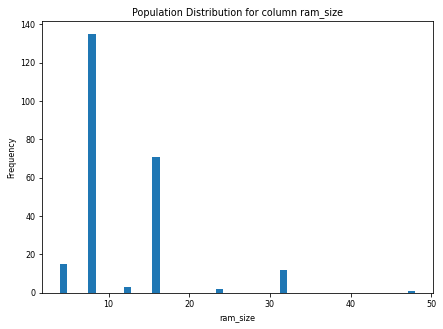


Expectation of Sample Mean(Sample Size = 10) of ram_size for 300 random combinations is 11.548
Variance of Sample Mean(Sample Size = 10) of ram_size for 300 random combinations is 4.561029333333346
Expectation of Sample Variance(Sample Size = 10) of ram_size for 300 random combinations is 43.96740740740737
Standard Error(Sample Size = 10) of ram_size for 300 random combinations is 1.911785682254362



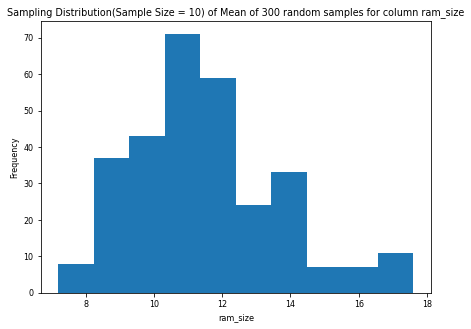

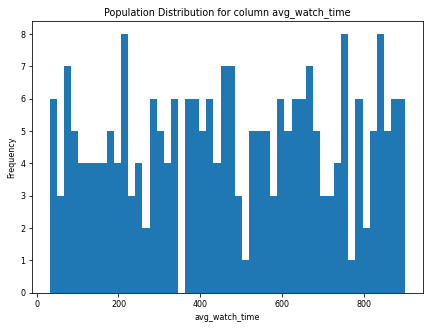


Expectation of Sample Mean(Sample Size = 10) of avg_watch_time for 300 random combinations is 474.02199999999993
Variance of Sample Mean(Sample Size = 10) of avg_watch_time for 300 random combinations is 6950.790049333331
Expectation of Sample Variance(Sample Size = 10) of avg_watch_time for 300 random combinations is 64664.38385185186
Standard Error(Sample Size = 10) of avg_watch_time for 300 random combinations is 79.30214500222027



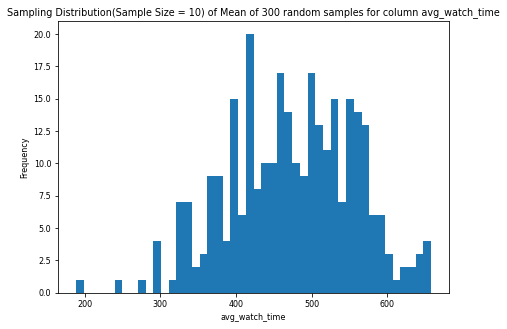

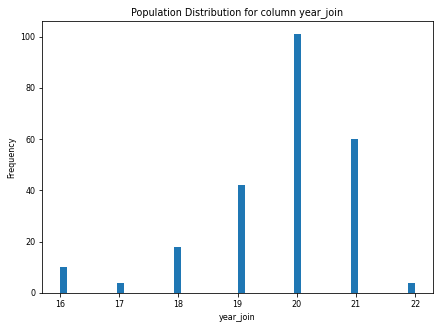


Expectation of Sample Mean(Sample Size = 10) of year_join for 300 random combinations is 19.741666666666653
Variance of Sample Mean(Sample Size = 10) of year_join for 300 random combinations is 0.15723055555555576
Expectation of Sample Variance(Sample Size = 10) of year_join for 300 random combinations is 1.6129999999999993
Standard Error(Sample Size = 10) of year_join for 300 random combinations is 0.38112302372866685



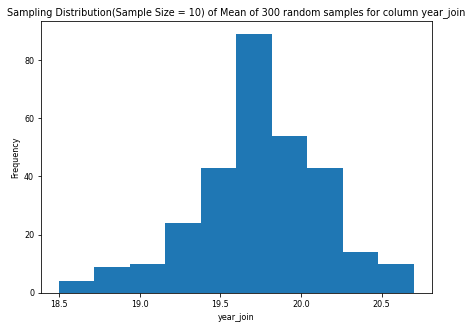


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------


Sampling Distributions of Categorical Data in given dataframe


Frequency of column stream of Sampling Distribution(Sample Size = 10) is 
UG     1931
PG      694
PhD     375
Name: stream, dtype: int64



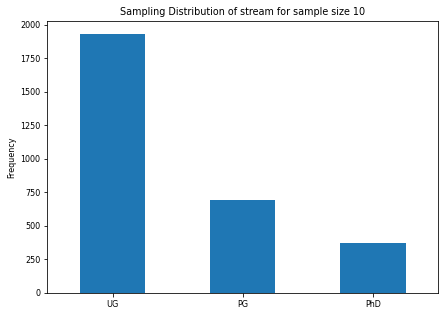

The Mode of the Column stream is UG and its sample proportion is 0.6436666666666667

Frequency of column brand of Sampling Distribution(Sample Size = 10) is 
HP        851
Acer      240
Asus      403
Lenovo    571
Dell      686
Apple     224
MSI        14
Xiaomi     11
Name: brand, dtype: int64



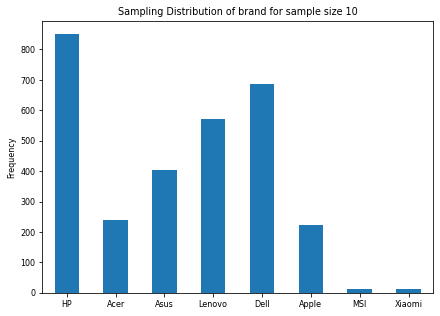

The Mode of the Column brand is HP and its sample proportion is 0.2836666666666667

Frequency of column price_range of Sampling Distribution(Sample Size = 10) is 
Rs. 60,000 - Rs. 70,000    668
Rs. 90,000 and above       624
Rs. 50,000 - Rs. 60,000    545
Rs. 40,000 - Rs. 50,000    417
Rs. 70,000 - Rs. 80,000    345
Rs. 80,000 - Rs. 90,000    242
Rs. 30,000 - Rs. 40,000    159
Name: price_range, dtype: int64



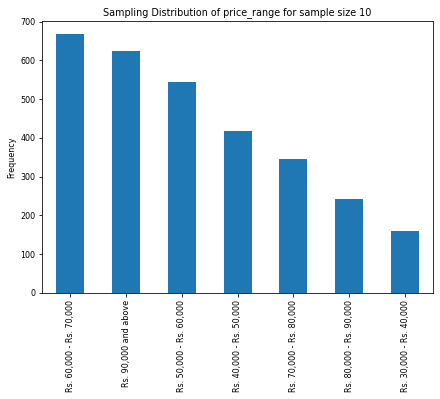

The Mode of the Column price_range is Rs. 60,000 - Rs. 70,000 and its sample proportion is 0.22266666666666668

Frequency of column display of Sampling Distribution(Sample Size = 10) is 
14 inch - 15 inch    1239
15 inch - 16 inch     933
13 inch - 14 inch     571
12 inch - 13 inch     193
16 inch - 17 inch      64
Name: display, dtype: int64



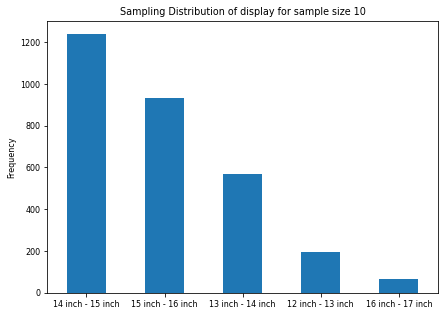

The Mode of the Column display is 14 inch - 15 inch and its sample proportion is 0.413

Frequency of column display_type of Sampling Distribution(Sample Size = 10) is 
Non-Touch    2692
Touch         308
Name: display_type, dtype: int64



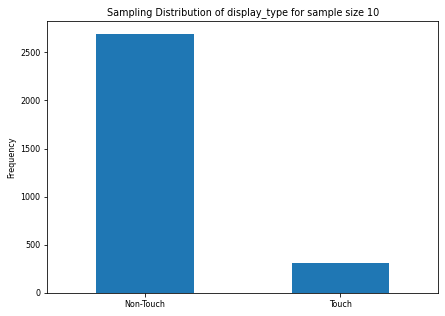

The Mode of the Column display_type is Non-Touch and its sample proportion is 0.8973333333333333

Frequency of column cpu_clock_speed of Sampling Distribution(Sample Size = 10) is 
2 GHZ - 3 GHZ      1185
Not sure            605
3 GHZ and above     835
1 GHZ - 2 GHZ       375
Name: cpu_clock_speed, dtype: int64



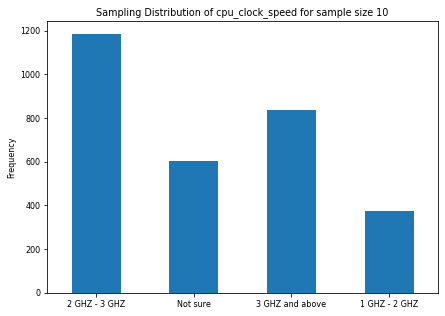

The Mode of the Column cpu_clock_speed is 2 GHZ - 3 GHZ and its sample proportion is 0.395

Frequency of column cpu of Sampling Distribution(Sample Size = 10) is 
AMD       529
Intel    2285
Apple     186
Name: cpu, dtype: int64



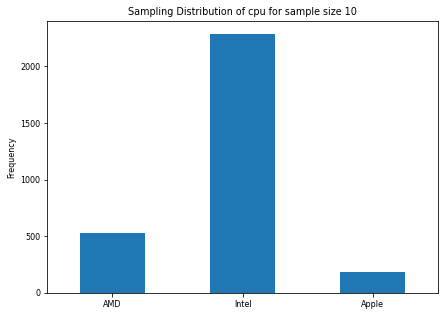

The Mode of the Column cpu is Intel and its sample proportion is 0.7616666666666667

Frequency of column cpu_model of Sampling Distribution(Sample Size = 10) is 
AMD Ryzen 5             292
Intel i5               1348
PENTIUM                  13
AMD Ryzen 7             206
Intel i3                228
M1                      175
Intel i7                618
AMD Ryzen 9              52
Radeon A-8 7410 APU      10
Intel i9                 50
dual core intel           8
Name: cpu_model, dtype: int64



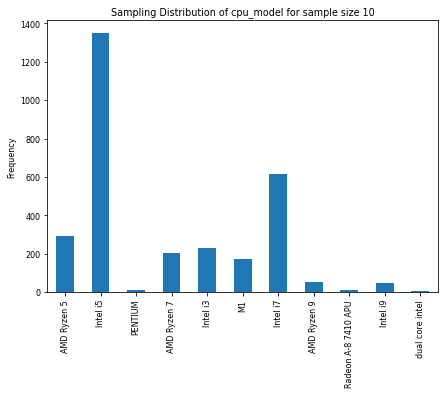

The Mode of the Column cpu_model is Intel i5 and its sample proportion is 0.4493333333333333

Frequency of column graphic_card of Sampling Distribution(Sample Size = 10) is 
AMD Radeon Graphics     429
Intel Graphics          656
Nvidia Graphics        1462
None                    300
Apple M1 GPU            153
Name: graphic_card, dtype: int64



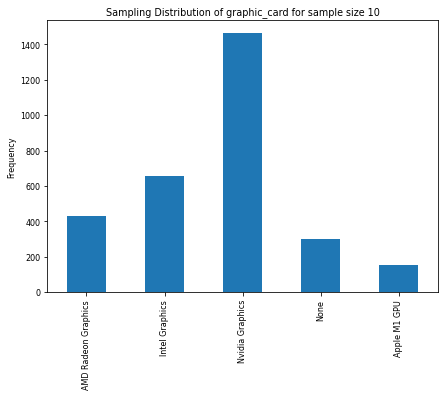

The Mode of the Column graphic_card is Nvidia Graphics and its sample proportion is 0.48733333333333334

Frequency of column storage_type of Sampling Distribution(Sample Size = 10) is 
SSD                          1426
HDD                           679
Hybrid (Both SSD and HDD)     895
Name: storage_type, dtype: int64



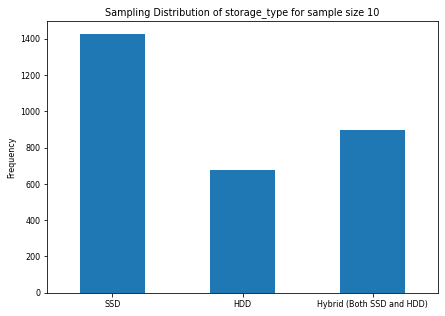

The Mode of the Column storage_type is SSD and its sample proportion is 0.47533333333333333

Frequency of column hdd_size of Sampling Distribution(Sample Size = 10) is 
None      1383
500 GB     328
1 TB      1170
2 TB       119
Name: hdd_size, dtype: int64



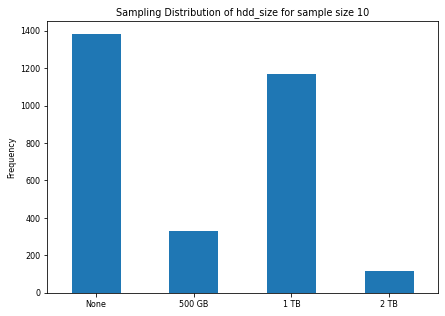

The Mode of the Column hdd_size is None and its sample proportion is 0.461

Frequency of column ssd_size of Sampling Distribution(Sample Size = 10) is 
512 GB    1034
None       639
256 GB     749
1 TB       325
128 GB     220
2 TB        33
Name: ssd_size, dtype: int64



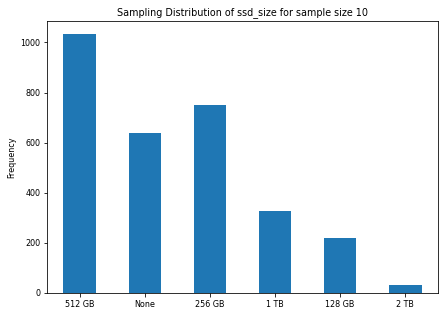

The Mode of the Column ssd_size is 512 GB and its sample proportion is 0.3446666666666667

Frequency of column operating_sys of Sampling Distribution(Sample Size = 10) is 
Windows                  1886
Windows, Linux            785
MacOS                     224
Linux                      69
Windows, Linux, MacOS      36
Name: operating_sys, dtype: int64



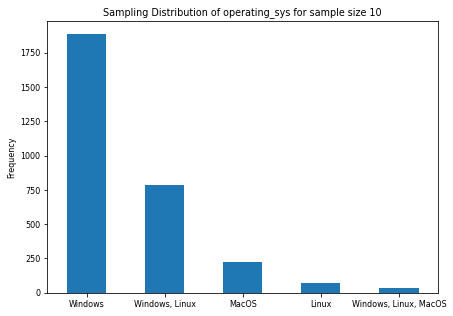

The Mode of the Column operating_sys is Windows and its sample proportion is 0.6286666666666667

Frequency of column department of Sampling Distribution(Sample Size = 10) is 
ch    251
mi     31
ph    109
bo     29
md     54
la     86
cs    464
ew     19
ma    239
ep    298
ms     99
es    104
me    288
ee    233
ai    299
bm    100
cy     36
am     11
sm     31
ce    164
cm     14
cc     16
em     10
ns     15
Name: department, dtype: int64



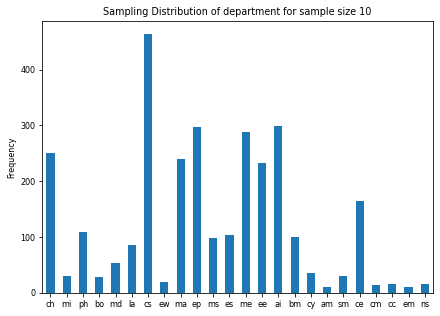

The Mode of the Column department is cs and its sample proportion is 0.15466666666666667



In [29]:
prop_list1 = func2(final_df,10,300)


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------


Sampling Distributions of Numerical Data in given dataframe



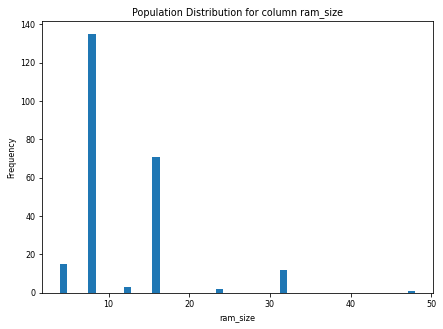


Expectation of Sample Mean(Sample Size = 20) of ram_size for 300 random combinations is 11.616666666666662
Variance of Sample Mean(Sample Size = 20) of ram_size for 300 random combinations is 2.060122222222222
Expectation of Sample Variance(Sample Size = 20) of ram_size for 300 random combinations is 42.7097543859649
Standard Error(Sample Size = 20) of ram_size for 300 random combinations is 1.3977343481772024



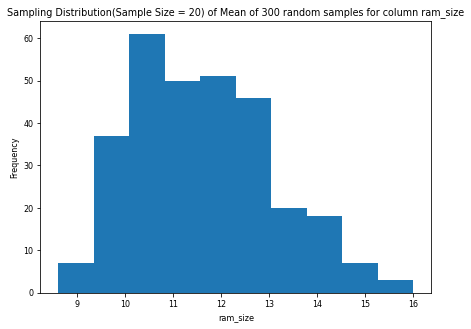

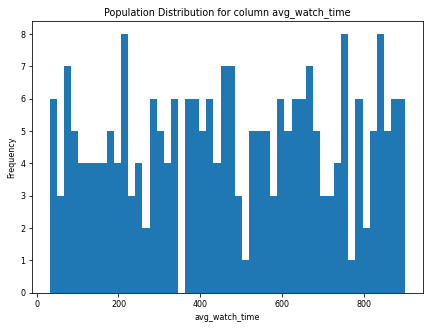


Expectation of Sample Mean(Sample Size = 20) of avg_watch_time for 300 random combinations is 472.6561666666669
Variance of Sample Mean(Sample Size = 20) of avg_watch_time for 300 random combinations is 2996.9838036388915
Expectation of Sample Variance(Sample Size = 20) of avg_watch_time for 300 random combinations is 63192.33979824565
Standard Error(Sample Size = 20) of avg_watch_time for 300 random combinations is 55.83216669810588



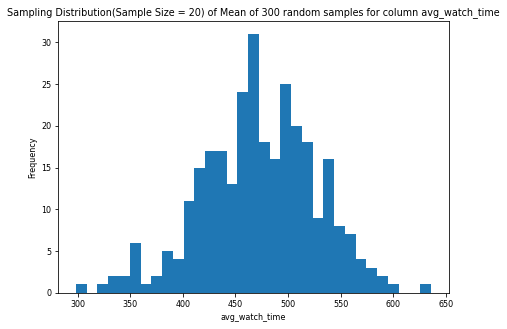

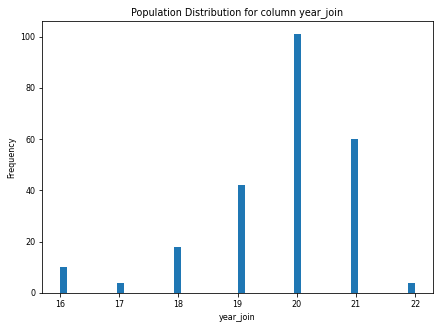


Expectation of Sample Mean(Sample Size = 20) of year_join for 300 random combinations is 19.758166666666686
Variance of Sample Mean(Sample Size = 20) of year_join for 300 random combinations is 0.082991638888889
Expectation of Sample Variance(Sample Size = 20) of year_join for 300 random combinations is 1.5502017543859659
Standard Error(Sample Size = 20) of year_join for 300 random combinations is 0.27155555787642416



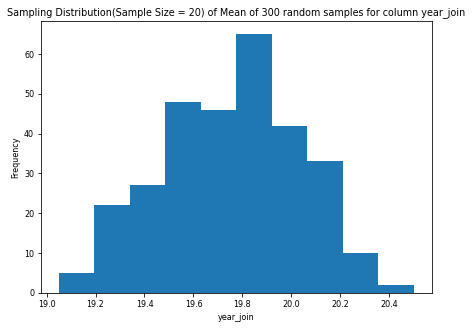


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------


Sampling Distributions of Categorical Data in given dataframe


Frequency of column stream of Sampling Distribution(Sample Size = 20) is 
UG     3883
PhD     690
PG     1427
Name: stream, dtype: int64



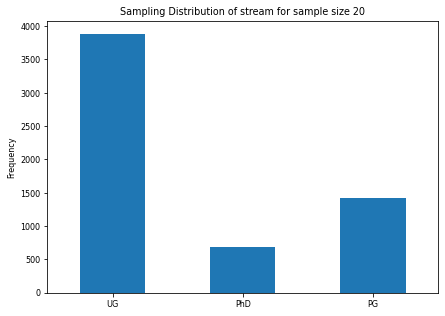

The Mode of the Column stream is UG and its sample proportion is 0.6471666666666667

Frequency of column brand of Sampling Distribution(Sample Size = 20) is 
Lenovo    1202
HP        1671
Dell      1358
Asus       741
Acer       499
Apple      481
Xiaomi      23
MSI         25
Name: brand, dtype: int64



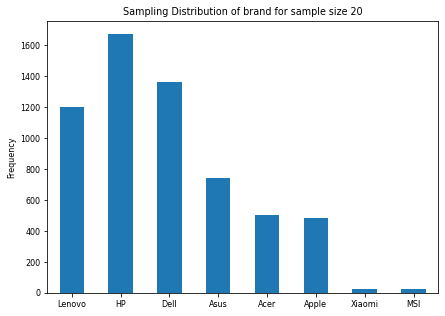

The Mode of the Column brand is HP and its sample proportion is 0.2785

Frequency of column price_range of Sampling Distribution(Sample Size = 20) is 
Rs. 90,000 and above       1326
Rs. 60,000 - Rs. 70,000    1316
Rs. 50,000 - Rs. 60,000    1009
Rs. 40,000 - Rs. 50,000     851
Rs. 70,000 - Rs. 80,000     678
Rs. 80,000 - Rs. 90,000     481
Rs. 30,000 - Rs. 40,000     339
Name: price_range, dtype: int64



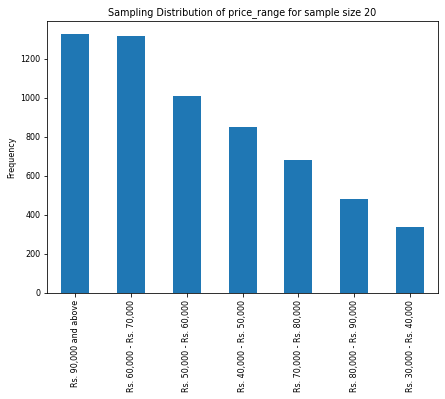

The Mode of the Column price_range is Rs. 90,000 and above and its sample proportion is 0.221

Frequency of column display of Sampling Distribution(Sample Size = 20) is 
14 inch - 15 inch    2525
15 inch - 16 inch    1855
13 inch - 14 inch    1131
12 inch - 13 inch     380
16 inch - 17 inch     109
Name: display, dtype: int64



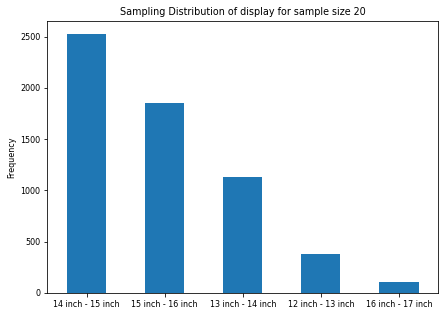

The Mode of the Column display is 14 inch - 15 inch and its sample proportion is 0.42083333333333334

Frequency of column display_type of Sampling Distribution(Sample Size = 20) is 
Touch         648
Non-Touch    5352
Name: display_type, dtype: int64



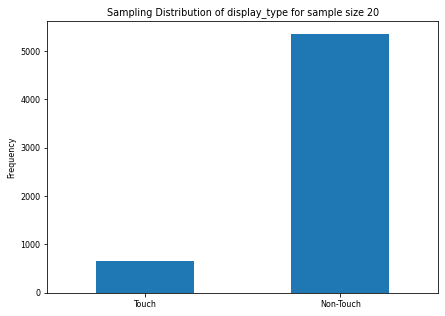

The Mode of the Column display_type is Non-Touch and its sample proportion is 0.892

Frequency of column cpu_clock_speed of Sampling Distribution(Sample Size = 20) is 
1 GHZ - 2 GHZ       739
3 GHZ and above    1678
2 GHZ - 3 GHZ      2366
Not sure           1217
Name: cpu_clock_speed, dtype: int64



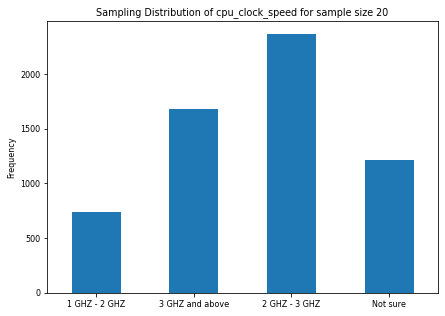

The Mode of the Column cpu_clock_speed is 2 GHZ - 3 GHZ and its sample proportion is 0.3943333333333333

Frequency of column cpu of Sampling Distribution(Sample Size = 20) is 
Intel    4586
AMD      1012
Apple     402
Name: cpu, dtype: int64



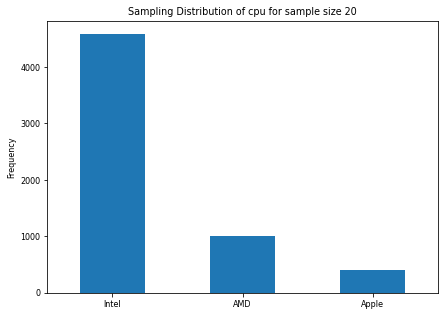

The Mode of the Column cpu is Intel and its sample proportion is 0.7643333333333333

Frequency of column cpu_model of Sampling Distribution(Sample Size = 20) is 
Intel i5               2672
Intel i7               1271
AMD Ryzen 5             585
Intel i3                428
M1                      379
AMD Ryzen 7             390
AMD Ryzen 9              93
PENTIUM                  31
Intel i9                102
Radeon A-8 7410 APU      20
dual core intel          29
Name: cpu_model, dtype: int64



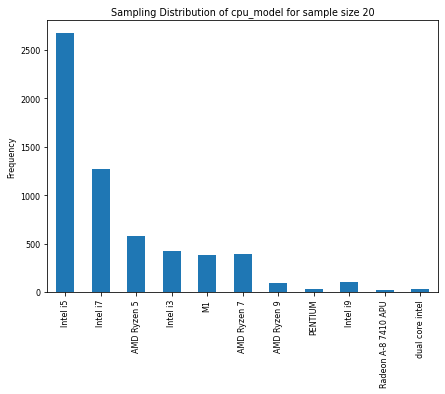

The Mode of the Column cpu_model is Intel i5 and its sample proportion is 0.44533333333333336

Frequency of column graphic_card of Sampling Distribution(Sample Size = 20) is 
Intel Graphics         1240
Nvidia Graphics        2977
Apple M1 GPU            339
AMD Radeon Graphics     861
None                    583
Name: graphic_card, dtype: int64



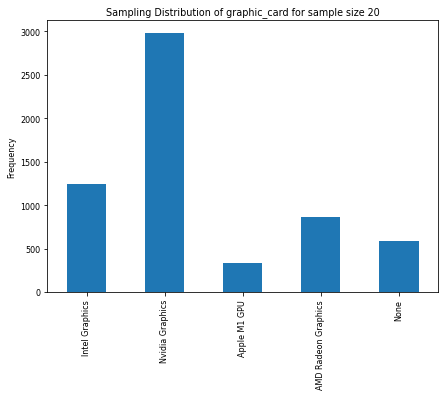

The Mode of the Column graphic_card is Nvidia Graphics and its sample proportion is 0.49616666666666664

Frequency of column storage_type of Sampling Distribution(Sample Size = 20) is 
SSD                          2839
Hybrid (Both SSD and HDD)    1719
HDD                          1442
Name: storage_type, dtype: int64



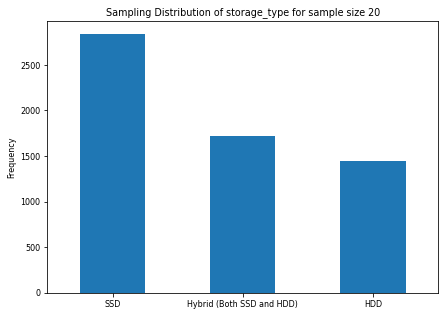

The Mode of the Column storage_type is SSD and its sample proportion is 0.4731666666666667

Frequency of column hdd_size of Sampling Distribution(Sample Size = 20) is 
None      2753
1 TB      2343
500 GB     664
2 TB       240
Name: hdd_size, dtype: int64



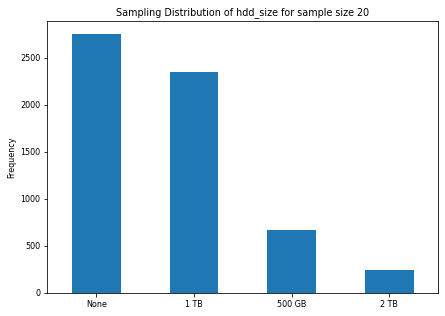

The Mode of the Column hdd_size is None and its sample proportion is 0.4588333333333333

Frequency of column ssd_size of Sampling Distribution(Sample Size = 20) is 
256 GB    1400
512 GB    2091
1 TB       671
None      1365
128 GB     407
2 TB        66
Name: ssd_size, dtype: int64



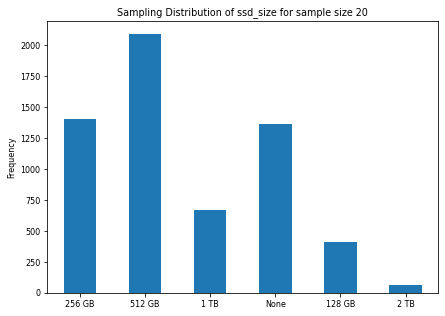

The Mode of the Column ssd_size is 512 GB and its sample proportion is 0.3485

Frequency of column operating_sys of Sampling Distribution(Sample Size = 20) is 
Windows                  3731
Windows, Linux           1593
MacOS                     481
Linux                     125
Windows, Linux, MacOS      70
Name: operating_sys, dtype: int64



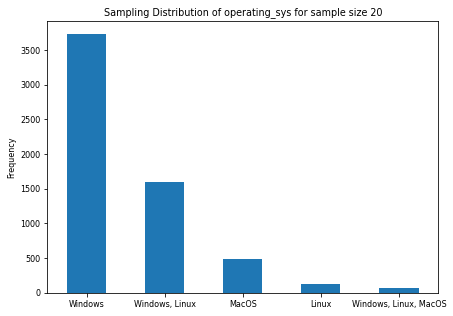

The Mode of the Column operating_sys is Windows and its sample proportion is 0.6218333333333333

Frequency of column department of Sampling Distribution(Sample Size = 20) is 
ee    428
ma    460
ep    617
bm    243
la    179
ai    640
cs    916
ph    240
ch    513
ce    309
cc     21
me    522
cy     75
md     97
sm     94
ns     27
mi     49
es    242
ms    200
ew     17
bo     51
am     23
em     22
cm     15
Name: department, dtype: int64



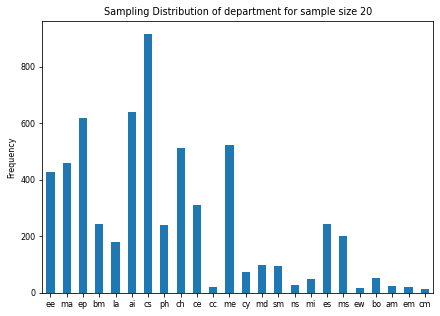

The Mode of the Column department is cs and its sample proportion is 0.15266666666666667



In [30]:
prop_list2 = func2(final_df,20,300)

# **Comparing Proportions of Population Data and Sample Data**

In [31]:
for i in range(len(final_df.columns)):
  modes_col = final_df.mode()
  print("The Proportions of the Column {} is \n{}".format(final_df.columns[i],final_df[final_df.columns[i]].value_counts()/len(final_df)))

The Proportions of the Column stream is 
UG     0.648536
PG     0.234310
PhD    0.117155
Name: stream, dtype: float64
The Proportions of the Column brand is 
HP        0.280335
Dell      0.225941
Lenovo    0.192469
Asus      0.129707
Acer      0.083682
Apple     0.079498
MSI       0.004184
Xiaomi    0.004184
Name: brand, dtype: float64
The Proportions of the Column price_range is 
Rs. 90,000 and above       0.221757
Rs. 60,000 - Rs. 70,000    0.217573
Rs. 50,000 - Rs. 60,000    0.167364
Rs. 40,000 - Rs. 50,000    0.142259
Rs. 70,000 - Rs. 80,000    0.117155
Rs. 80,000 - Rs. 90,000    0.079498
Rs. 30,000 - Rs. 40,000    0.054393
Name: price_range, dtype: float64
The Proportions of the Column display is 
14 inch - 15 inch    0.418410
15 inch - 16 inch    0.309623
13 inch - 14 inch    0.188285
12 inch - 13 inch    0.062762
16 inch - 17 inch    0.020921
Name: display, dtype: float64
The Proportions of the Column display_type is 
Non-Touch    0.891213
Touch        0.108787
Name: display_typ

In [32]:
print(prop_list1)

[UG     0.643667
PG     0.231333
PhD    0.125000
Name: stream, dtype: float64, HP        0.283667
Acer      0.080000
Asus      0.134333
Lenovo    0.190333
Dell      0.228667
Apple     0.074667
MSI       0.004667
Xiaomi    0.003667
Name: brand, dtype: float64, Rs. 60,000 - Rs. 70,000    0.222667
Rs. 90,000 and above       0.208000
Rs. 50,000 - Rs. 60,000    0.181667
Rs. 40,000 - Rs. 50,000    0.139000
Rs. 70,000 - Rs. 80,000    0.115000
Rs. 80,000 - Rs. 90,000    0.080667
Rs. 30,000 - Rs. 40,000    0.053000
Name: price_range, dtype: float64, 14 inch - 15 inch    0.413000
15 inch - 16 inch    0.311000
13 inch - 14 inch    0.190333
12 inch - 13 inch    0.064333
16 inch - 17 inch    0.021333
Name: display, dtype: float64, Non-Touch    0.897333
Touch        0.102667
Name: display_type, dtype: float64, 2 GHZ - 3 GHZ      0.395000
Not sure           0.201667
3 GHZ and above    0.278333
1 GHZ - 2 GHZ      0.125000
Name: cpu_clock_speed, dtype: float64, AMD      0.176333
Intel    0.761667
Apple

# Point Estimation

### Average Watch *Time*

In [33]:
sample_avg_time = np.random.choice(a= data['avg_watch_time'],size=100)
print ( sample_avg_time.mean() )
print (data['avg_watch_time'].mean() - sample_avg_time.mean())

487.3
-13.207949790794999


### Ram **Size**

In [34]:
sample_ram_size = np.random.choice(a= final_df['ram_size'],size=100)
sample_ram_size = sample_ram_size.astype('float')
print ( sample_ram_size.mean() )
print (final_df['ram_size'].mean() - sample_ram_size.mean())

10.44
1.2420083682008372


### Joining Year

In [35]:
sample_joining_year = np.random.choice(a= final_df['year_join'],size=100)
print ( sample_joining_year.mean() )
print (final_df['year_join'].mean() - sample_joining_year.mean())

19.84
-0.09941422594142324


# Confidence Interval Margin of Error

### Average Watch *Time*

In [36]:
sample_size = 100
sample = np.random.choice(a= final_df['avg_watch_time'], size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = final_df['avg_watch_time'].std()  # Get the population standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

print("Margin of Error:")
print(margin_of_error)

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Margin of Error:
49.80636183538905
Confidence interval:
(424.60363816461097, 524.2163618353891)


### Joining Year

In [37]:
sample_size = 100
sample = np.random.choice(a= final_df['year_join'], size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = final_df['year_join'].std()  # Get the population standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

print("Margin of Error:")
print(margin_of_error)

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Margin of Error:
0.24434944520622548
Confidence interval:
(19.535650554793776, 20.024349445206227)


### Ram **Size**

In [38]:
sample_size = 100
sample = np.random.choice(a= final_df['ram_size'], size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = final_df['ram_size'].std()  # Get the population standard deviation
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

print("Margin of Error:")
print(margin_of_error)

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Margin of Error:
1.308990950121673
Confidence interval:
(11.531009049878326, 14.148990950121673)
